In [65]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/FuelConsumption (1).csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [68]:
# outputs number of unique values
df['ENGINE SIZE'].nunique()

40

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [70]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [71]:
# dropping columns that are not needed
df.drop(columns=['Year', 'COEMISSIONS '], inplace=True)

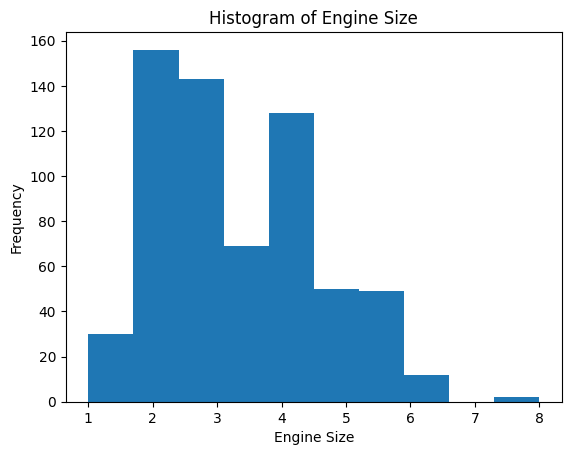

In [72]:
# common ENGINE SIZES for veicles
plt.hist(df["ENGINE SIZE"])
plt.xlabel("Engine Size")
plt.ylabel("Frequency")
plt.title("Histogram of Engine Size")
plt.show()

In [73]:
df['ENGINE SIZE'].describe()

count    639.000000
mean       3.265728
std        1.231012
min        1.000000
25%        2.200000
50%        3.000000
75%        4.300000
max        8.000000
Name: ENGINE SIZE, dtype: float64

In [74]:
# demonstrating the correlation between the following features
df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']].corr()['FUEL CONSUMPTION']

ENGINE SIZE         0.858170
CYLINDERS           0.825784
FUEL CONSUMPTION    1.000000
Name: FUEL CONSUMPTION, dtype: float64

In [75]:
# data cleaning pt.1 - finding null values
df.isna().sum()

MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
dtype: int64

In [76]:
# data cleaning pt.2 - dropping any duplicates
df.duplicated().sum()

1

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
# data cleaning pt.3 - fixing column names
for i in df.columns:
  print(i.capitalize())

Make
Model
Vehicle class
Engine size
Cylinders
Transmission
Fuel
Fuel consumption


In [79]:
new_columns_names = []
for i in df.columns:
  new_columns_names.append(i.capitalize())

In [80]:
df.columns = new_columns_names

In [81]:
df.head()

,Make,Model,Vehicle class,Engine size,Cylinders,Transmission,Fuel,Fuel consumption
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4


In [82]:
# machine learning
from sklearn.model_selection import train_test_split

In [83]:
X = df[["Engine size", "Cylinders"]]
y = df["Fuel consumption"]

In [84]:
# we are training 80% of our data and testing 20% of our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [86]:
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
lr.coef_

array([1.5199593 , 0.64469066])

In [88]:
# 1.56878878 * X1 + 0.64340051 * X2 = Y
# 1.56878878 * Engine Size + 0.64340051 * Cylinders = Fuel Consumption
predictions = lr.predict(X_test)

In [89]:
predictions

array([14.13759478, 14.7455785 , 14.44158664, 10.5682745 , 14.44158664,
       15.65755408, 14.13759478, 11.32825415, 14.7455785 , 12.88492039,
       13.68160699, 18.16290285, 14.13759478, 15.96154594, 15.20156629,
       19.22687436, 13.68160699, 11.63224601, 14.44158664, 15.96154594,
       18.16290285, 11.63224601, 15.65755408, 18.16290285, 11.32825415,
       14.89757443, 17.25092727, 16.41753373, 14.13759478, 11.63224601,
       18.16290285, 12.24022973, 16.2655378 , 16.41753373, 11.63224601,
       11.32825415, 14.59358257, 11.63224601, 16.41753373, 12.88492039,
       17.25092727, 15.65755408, 11.93623787, 22.10962888, 14.89757443,
       11.32825415, 17.70691506, 16.41753373, 13.98559885, 16.41753373,
       16.41753373, 19.22687436, 12.24022973, 11.93623787, 18.77088657,
       11.63224601, 18.16290285, 15.20156629, 11.63224601, 12.73292446,
       19.07487843, 19.22687436, 19.07487843, 15.80955001, 11.02426229,
       14.44158664, 14.7455785 , 12.69621752, 19.53086623, 17.25

In [90]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

1.310384268655732

In [91]:
df["Fuel consumption"].describe()

count    638.000000
mean      14.705956
std        3.303962
min        4.900000
25%       12.500000
50%       14.400000
75%       16.600000
max       30.200000
Name: Fuel consumption, dtype: float64

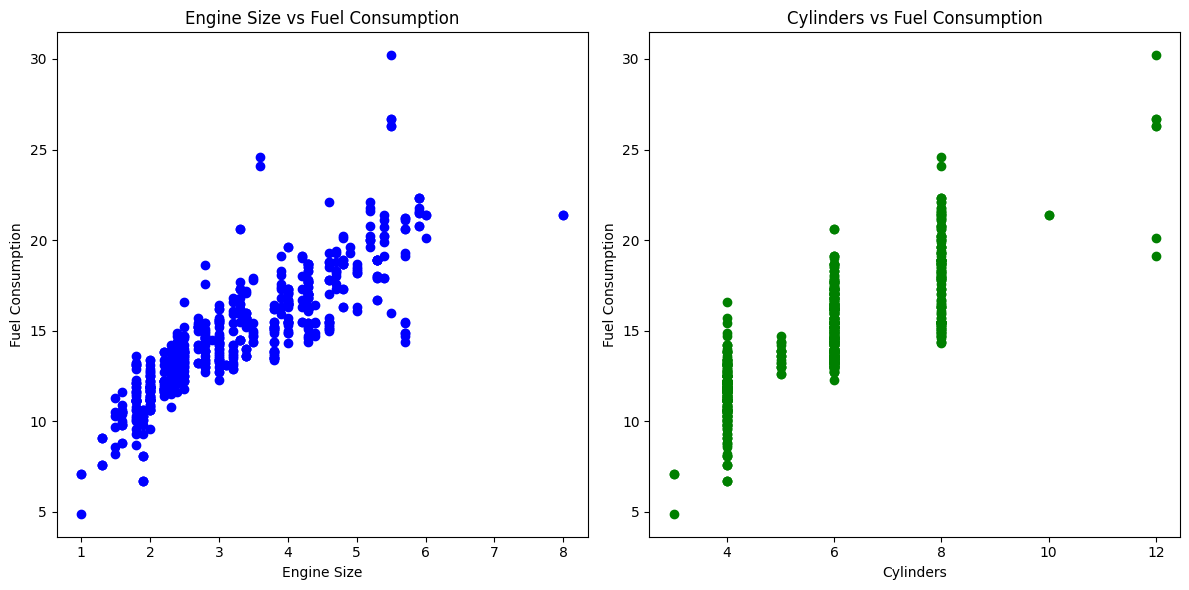

In [92]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for Engine size vs Fuel consumption
axes[0].scatter(X["Engine size"], y, color='blue')
axes[0].set_title('Engine Size vs Fuel Consumption')
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Fuel Consumption')

# Scatter plot for Cylinders vs Fuel consumption
axes[1].scatter(X["Cylinders"], y, color='green')
axes[1].set_title('Cylinders vs Fuel Consumption')
axes[1].set_xlabel('Cylinders')
axes[1].set_ylabel('Fuel Consumption')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


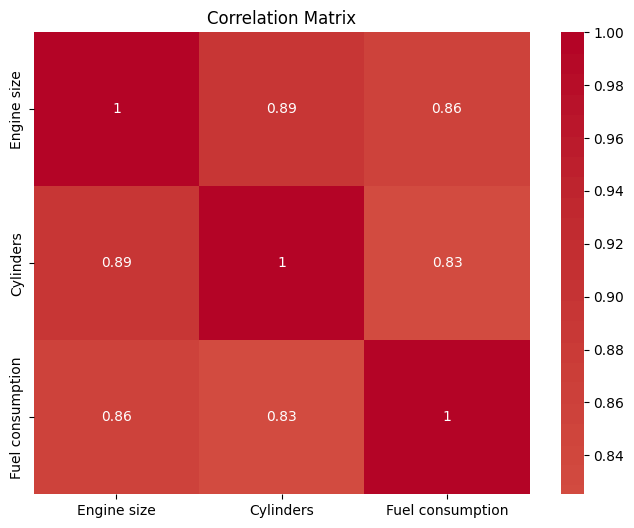

In [93]:
import seaborn as sns
# Calculate correlation matrix
corr_matrix = df[["Engine size", "Cylinders", "Fuel consumption"]].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()